파이토치 권장 코딩 스타일

In [1]:
import torch
#1 2 3이 들어 있는 텐서
a = torch.tensor([1,2,3])
b = torch.tensor([4,5,6])
# 두 텐서의 합
c = a + b
print(c)

tensor([5, 7, 9])


모듈 클래스
  - 신경망 생성
데이터셋 클래스
  - 데이터

In [3]:
import torch.nn as nn
class Net(nn.Module):
  def __init__(self):
    # 입력, 히든, 출력 개수를 입력받아서 인스턴스변수로 생성
    pass
  def forward(self, input):
    # 신경망 동작 정의
    output = None
    return output

In [4]:
class Dataset():
  def __init__(self):
    # 필요한 데이터 불러오기
    pass

  def __len__(self):
    # 데이터 개수 반환
    data=None
    return len(data)

  def __getitem__(self, i):
    # i번째 입력데이터와 i번째 정답을 반환
    data,label = [],[]
    return data[i], label[i]

In [5]:
# 데이터 로더로부터 데이터와 정답을 받아옴
# 데이터 로더는 데이터셋을 이용해서 배치단위로 데이터를 분할
DataLoader = None
model = None
for data, label in DataLoader():
  # 모델의 예측값 계산
  prediction = model(data)

  # 손실 함수를 이용해 오차 계산
  LossFunction = None
  loss = LossFunction(prediction,label)

  # 오차 역전파
  loss.backward()

  # 신경망 가중치 수정\
  optimizer = None
  optimizer.step()


TypeError: 'NoneType' object is not callable

문제해결 프로세스
  - 해결할 문제정의 - 데이터 수집 - 데이터 가공 - 딥러닝 모델 설계 - 딥러닝 모델 학습 -  성능 평가

딥러닝에 필요한 최소한의 통계 개념
  - 종속변수와 독립변수
  - 평균과 분산
    - 데이터의 대략적인 분포를 알수 있다
    - 평균 : 정규분포와 같은 종형분포를 갖는 확률 분포에서 랜덤하게 데이터를 뽑았을때 평균에 가까운 값이 나올 확률이 가장 크다는 것을 의미한다.
    - 분산 : 데이터가 얼파나 퍼졌는가를 나타내는 지표, 분산이 크다는 것은 평균으로 부터 넓게 데이터가 흩어져 있다는 것을 의미

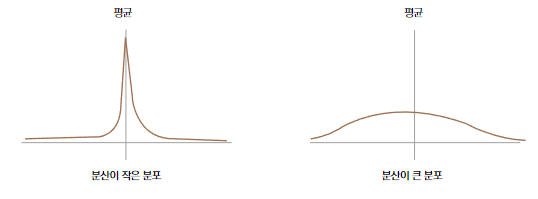

시각화 : 직관적 분석에 유용함

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# 정규분포로부터 랜덤하게 값을 추출
# 0부터 5까지 0.2씩 증가시킨 값을 저장
t = np.arange(0,5,0.2)
t2 = t**2
t3 = t**3

# mu 는 평균으로 , sigma를 표준편차로 갖는 정규분포로부터 랜덤하게 값을 추출
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)


In [8]:
# 표준 정규분포를 따르는 난수를  생성
np.random.randn(10000)

array([ 0.38731146,  0.06825948,  0.75021736, ..., -0.15958956,
       -0.5972718 , -0.34190637])

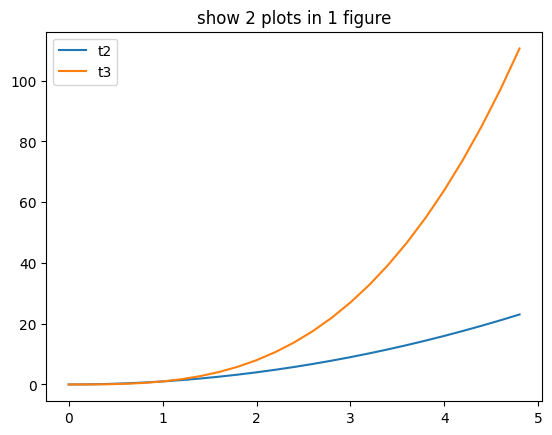

In [9]:
plt.plot(t, t2 ,label='t2')
plt.plot(t, t3 ,label='t3')
plt.title('show 2 plots in 1 figure')
plt.legend()
plt.show()

데이터의 분포를 확인하고 싶다면 - 히스토그램을 이용


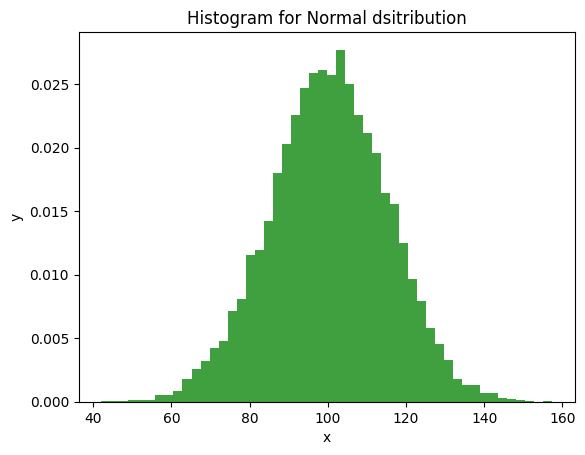

In [10]:
plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram for Normal dsitribution')
plt.hist(x, 50,density=True,alpha=0.75, facecolor='g')
plt.show()

최고점과 최저점을 받은 학생 두명을 제외하고 모두가 같은 점수를 받았다면, 학생들의 점수 분포의 분산은 클까? 작을까?, 학생수는 매우많고 학생간의 점수차는 크지 않다

인공신경망 ANN 이해하기
  - 퍼셉트론 -> 다층신경망 -> 인공신경망의 학습방법->손실함수->경사하강법과 오차 역전파->신경망 성능 비교->기울기 소실 예방

핵심용어
  - 인공뉴런(퍼셉트론) : 입력값과 가중치, 편향을 이용해 출력값을 내는 모델
  - 단층 인공 신경망 : 퍼셉트론 하나
  - 다층 인공 신경망 : 퍼셉트론 여러개
  - 입력은 입력층, 출력은 출력증 .. 나머지는 은닉층(입력이후 출력전까지)
  - 가중치 : 입력의 중요도, 편향은 활성화의 경계가 원점으로부터 얼마나 이동할지(보정역활)
  - 활성화 함수 : 출력을 다음 출력으로 넘길지 결정, 시그모이드(0~1 출력을 고정)
  - 손실함수 : 정답과 신경망의 예측의 차이를 타나내는 함수
  - 경사 하강법 : 손실을 가중치에 대해 미분한 다음, 기울기의 반대 방향으로 학습률 만큼 이동
  - 오차 역전파 : 올바른 가중치를 찾기 위해서 오차를 출력층으로 부터 입력층까지 전파하는 방식
  - 오버피팅: 과적합
  - 기울기 소실 : 출력층으로 부터 멀어질수록 역전파 되는 오차가 0에 가까우지는 현상

퍼셉트론 : ANN artifical neural network

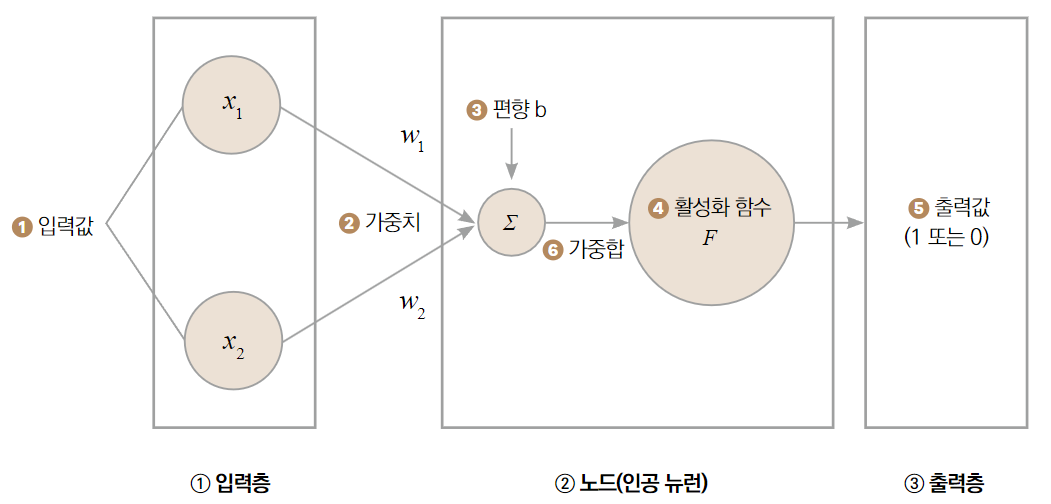

퍼셉트론은 직선의 방정식.... 선 아래 또는 위로 어떤 데이터가 있는지 구분하는 결정경계역활을 한다.

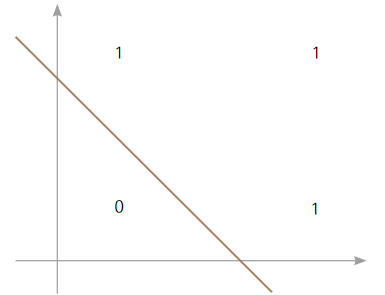

단층 신경망의 한계 -  XOR

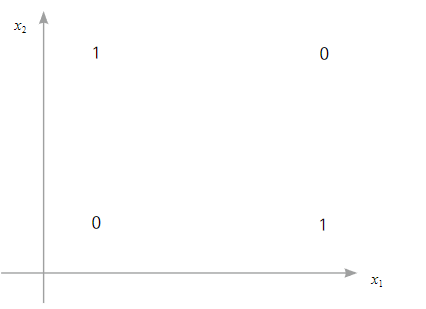

In [11]:
# XOR - Exclusive OR  배타적   or
# OR 연산자와 같은 결과를 내지만  참과 참이면 거짓이 된다.
# 0   0     0
# 1   0     1
# 0   1     1
# 1   1     0


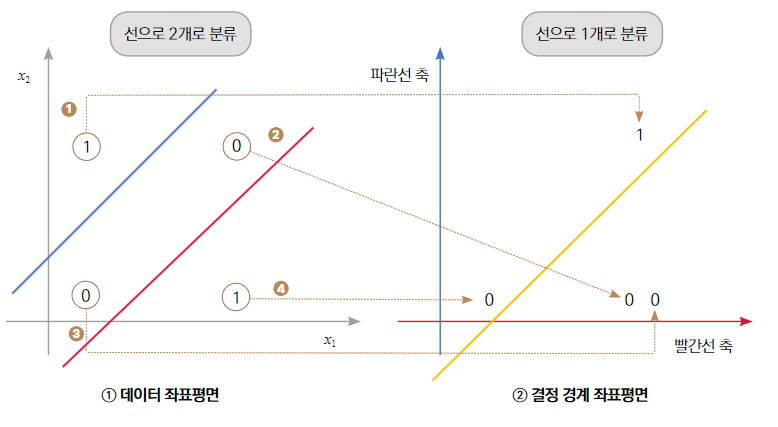

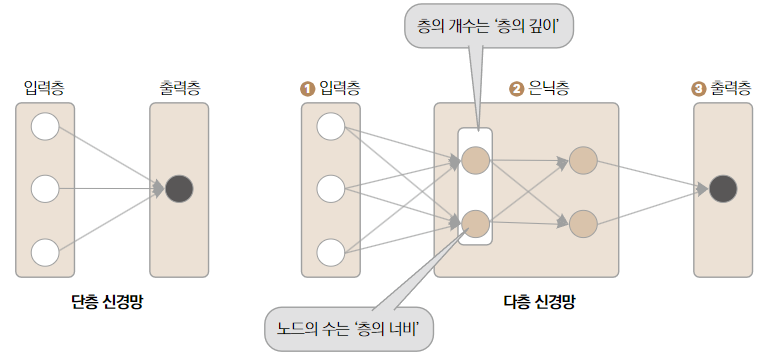

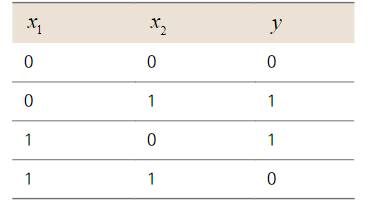

임의로 만든 신경망

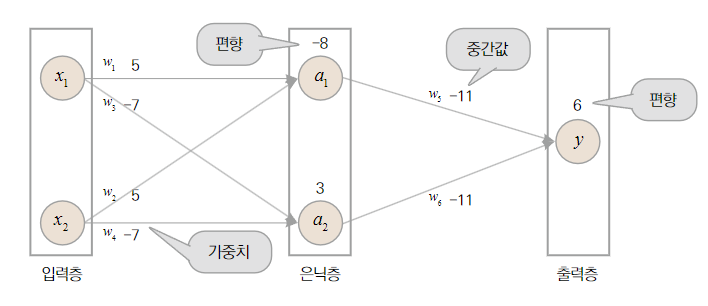

In [12]:
# 출력층에서 활성화 함수를 적용 0보다 크면 1이고 작으면 0 을 반환하는 이진분류 함수를 이용

In [13]:
# a1 = F(5x1 + 5x2 - 8) = F(-8) = 0
# a2 = F(-7x1 -7x2 +3) = F(+3) = 1
# 모든 연산에 적용하면
# x1 x2   a1             a2           y
# 0  0  F(-8)=0       F(3)=1         F(-5)=0
# 0  1  F(-3)=0       F(-4)=0        F(6) =1
# 1  0  F(-3)=0       F(-4)=0        F(6) = 1
# 1  1  F(2)=1        F(-11) = 0     F(-16) = 0

# 신경망의 출력결과가 실제 정답과 일치하는 것을 알수 있다

손실 함수로 올바른 가중치 찾기

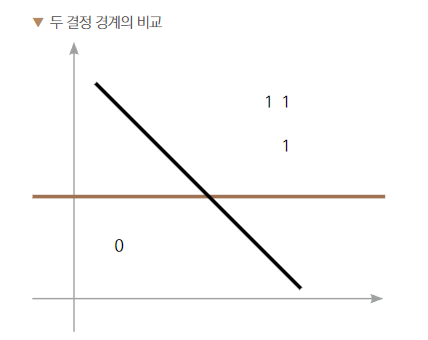

In [14]:
# 어떤 결정경계가 더 낳은 경계인지 알수 있는 지표가 있다.
# 하나의 점으로 부터 직선까지의 거리를 오차라고 가정 이 오차의 제곱의 평균이 작을수록 데이터를 잘 분류
# 오차를 구하는 함수를 오차함수 또는 손실함수

대표적인 손실함수

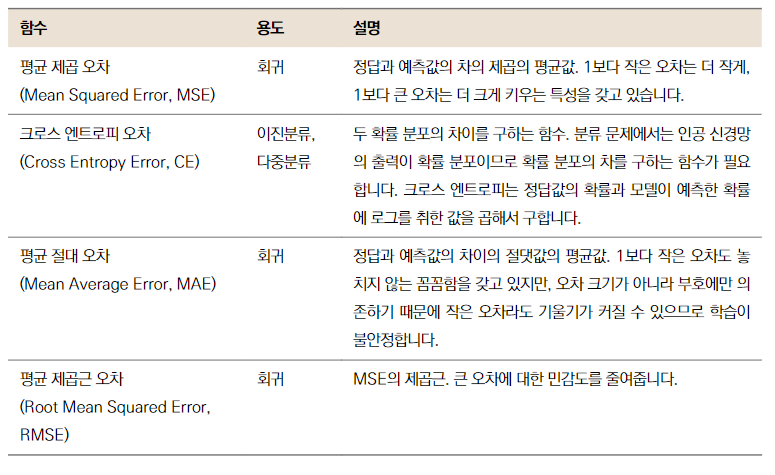

경사하강법과 오차 역전파로 최적의 값 찾기

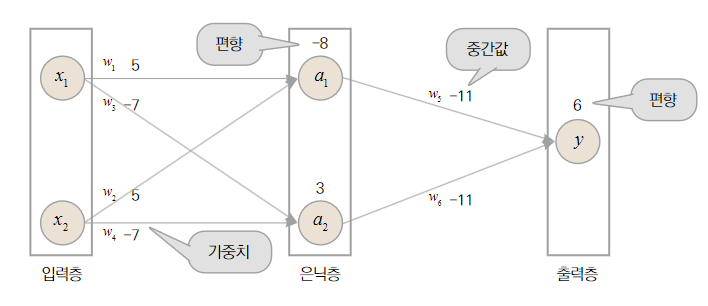

In [15]:
# a1 = F(5x1 + 5x2 - 8)
# a2 = F(-7x1 -7x2 + 3)

# a1 = F(w1x1 + w2x2 + b1)
# a2 = F(w3x1 + w4x2 + b2)

# y' = F(w5a1 + w6a2 + b3)

# L(y, y')


손실을 줄이는 방향으로 가중치를 변경해 나가야 함 - 경사하강법이라는 알고리즘을 이용
  - 손실 함수를 미분해서 손실함수의 경사면을 따라 조금씩 이동해 나간다
  - 기울기의 반대방향 즉 기울기 값에 -1을 곱한 값만큼 변수의 값을 이동시켜서 최소값에 조금씩 다가가는 알고리즘
  - 시작점에서 어느정도 이동할지를 손실함수의 기울기와 학습률로 결정

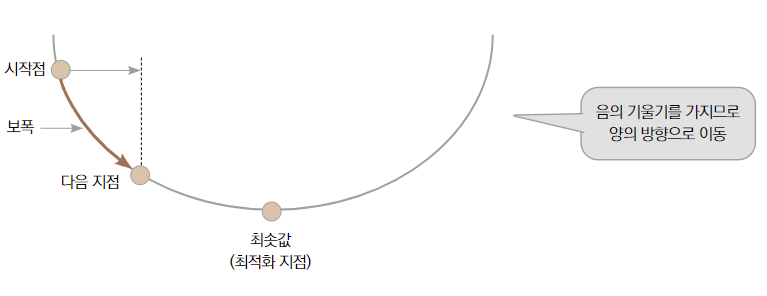

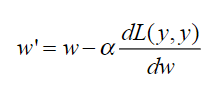

경사하강법의 예시

MSE

$MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$

기울기 m에대한 MSE 편미분
$\delta_m = \frac{-2}{n} \sum_{i=1}^{n} x_i (\hat{y}_i - y_i)$

y절편 b에 대한 mse의 편미분  $\delta_b = \frac{-2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)$


In [16]:
x = np.array([1,2,3,4,5])
y = np.array([2,4,5,4,5])

# 초기값
m = 0 # 기울기
b = 0 # y 절편
learning_rate = 0.01 # 학습률
epochs = 1000 # 반복횟수

# 경사하강법을 적용해서 모델 파라메터를 업데이트 한다.
for epoch in range(epochs):
  # 현재 모델의 예측 값 계산
  y_pred = m * x + b
  # 손실함수(MSE) 기울기 계산
  delta_m = (-2 / len(x)) * np.sum(x * (y - y_pred))
  delta_b = (-2 / len(x)) * np.sum(y - y_pred)

  # 모델 파라메터를 업데이트
  m -= learning_rate * delta_m
  b -= learning_rate * delta_b

  # 출력
  if epoch % 100 == 0:
    loss = np.mean( (y_pred - y)**2 )
    print(f"epoch:{epoch}, loss:{loss}")

print(f"최종 모델 파라메터 : 기울기 {m} 절편 b:{b}")


epoch:0, loss:17.2
epoch:100, loss:0.8098859948340905
epoch:200, loss:0.6475713164381887
epoch:300, loss:0.5651207584818807
epoch:400, loss:0.5232385665908599
epoch:500, loss:0.5019637803301553
epoch:600, loss:0.49115688341281166
epoch:700, loss:0.48566733256370115
epoch:800, loss:0.4828788199355663
epoch:900, loss:0.48146234654985554
최종 모델 파라메터 : 기울기 0.6176946148762643 절편 b:2.136116825825789


오차 역전파

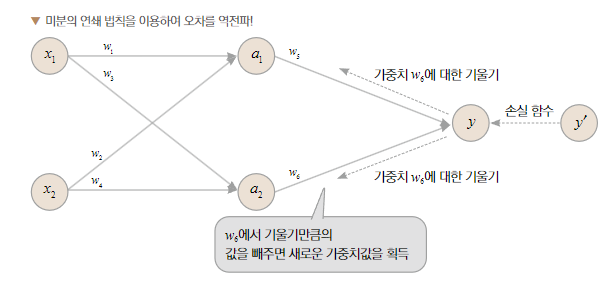

1. 시그모이드 함수:
   $f(x) = \frac{1}{1 + e^{-x}}$

2. 시그모이드 함수를 미분하는 과정:
   $f'(x) = \frac{d}{dx} \left( \frac{1}{1 + e^{-x}} \right)$

3. 체인 룰을 사용하여 미분:
   $f'(x) = - \frac{1}{(1 + e^{-x})^2} \cdot (-e^{-x})$

   $ = \frac{e^{-x}}{(1 + e^{-x})^2} $

4. 분자와 분모에 $ e^{-x} $ 를 곱함:
   $ f'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} \cdot \frac{e^{x}}{e^{x}} $

   $ = \frac{e^{-x}}{1 + e^{-x}} \cdot \frac{e^{x}}{1 + e^{-x}} $

   $ = \left( \frac{1}{1 + e^{-x}} \right) \cdot \left( \frac{e^{x}}{1 + e^{-x}} \right) $

   $ = f(x) \cdot (1 - f(x)) $

따라서, $ f'(x) = f(x) \cdot (1 - f(x)) $ 가 됩니다.


3. 체인 룰을 사용하여 미분하는 과정:

우선 시그모이드 함수를 다음과 같이 표기합니다:
$ y = \frac{1}{1 + e^{-x}} $

$ y $ 를 $ u $ 로 치환합니다:
$ u = 1 + e^{-x} $

$ u $ 를 $ x $ 로 미분합니다:
$ \frac{du}{dx} = -e^{-x} $

$ y $ 를 $ u $ 로 표현하여 미분합니다:
$ \frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx} $

여기서 $ \frac{dy}{du} $ 는 $ y $ 를 $ u $ 로 미분한 것입니다:
$ \frac{dy}{du} = \frac{d}{du} \left( \frac{1}{u} \right) = - \frac{1}{u^2} $

그리고 $ \frac{du}{dx} = -e^{-x} $ 이므로,
$ \frac{dy}{dx} = - \frac{1}{u^2} \cdot (-e^{-x}) $

$ = \frac{e^{-x}}{u^2} $

여기서 $ u = 1 + e^{-x} $ 이므로,
$ \frac{dy}{dx} = \frac{e^{-x}}{(1 + e^{-x})^2} $

이것이 시그모이드 함수를 미분한 결과입니다.


활성화 함수로 기울기 소실 예방
  - 시그모이드 도함수는 최대값이 0.25 이고 곱할때마다 오차가 점점 줄어든다
  - 각 층이 너무 깊어지면 출력층에 가까운 은닉층들은 제대로 학습이 이루어지나, 입력층에 가깐운 은닉층들은 학습이 제대로 이루어지지 않다
  - 시그모이드의 도함수는 Z의 크기가 커지면 도함수의 값이 0에 가까워진다 기울기가 0에 가까워지는 현상을 기울기 소실문제

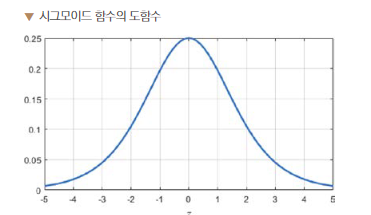

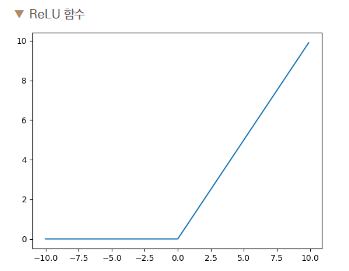

신경망 성능 비교하기
  - 손실함수의 값이 작으면 작을수록 좋을까?

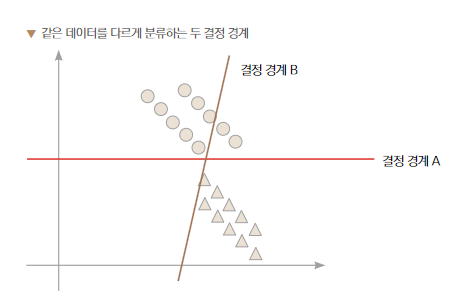

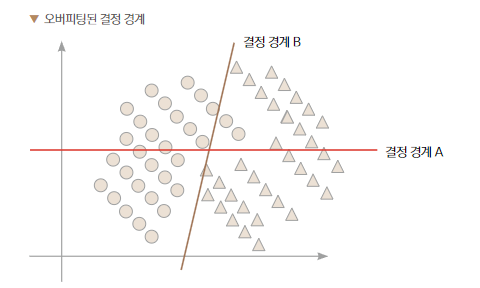

과적합 - 오버피팅
  - 매 학습할때마다 검증하는 검증용 데이터 중요